**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
# Import the data set
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [6]:
df = pd.read_csv('C:/Users/Prachi/Desktop/technocolabs/dataset/Data set/cleaned_data.csv')
df.shape
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [8]:
features_response = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

In [9]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


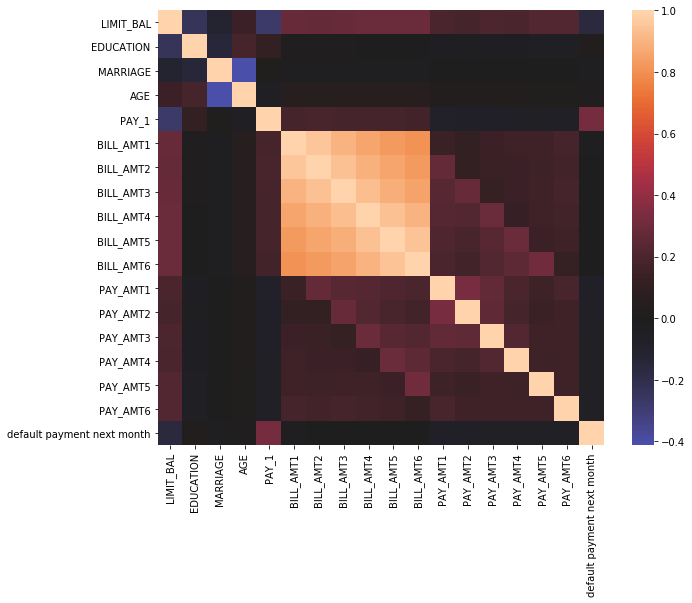

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           center = 0)
plt.show()

In [11]:

X = df[features_response].iloc[:, :-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)


(26664, 17) (26664,)


In [12]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [13]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [14]:
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)
selector.fit(X, y)

SelectPercentile(percentile=20,
                 score_func=<function f_classif at 0x000001790D056708>)

In [15]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [16]:
features = features_response[:-1]
best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]

best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [17]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [18]:
group_by_pay_mean_y = df.groupby("PAY_1").agg({"default payment next month":np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


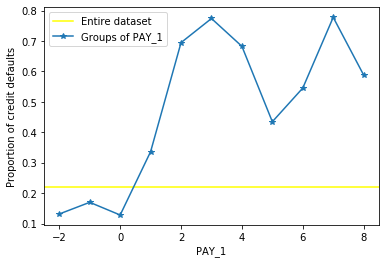

In [19]:
axes = plt.axes()

axes.axhline(overall_default_rate, color = "yellow")

group_by_pay_mean_y.plot(marker='*', legend=False, ax=axes)

axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

plt.show()

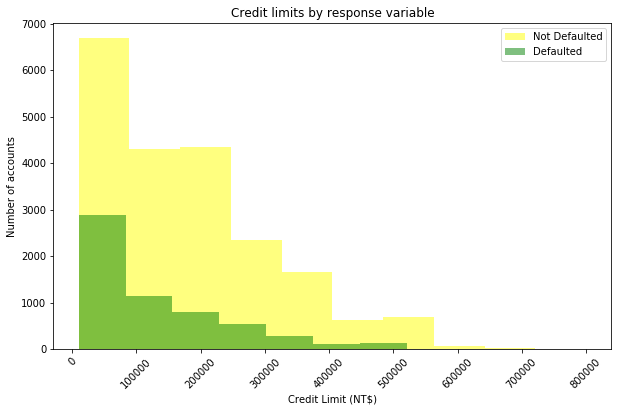

In [20]:
pos_mask = y==1
neg_mask = y==0
plt.figure(figsize = (10,6))

plt.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha = 0.5, color = 'yellow')
plt.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha = 0.5, color = 'green')

plt.tick_params(axis = 'x', labelrotation = 45)

plt.xlabel("Credit Limit (NT$)")
plt.ylabel("Number of accounts")

plt.legend(["Not Defaulted", "Defaulted"])

plt.title("Credit limits by response variable")

plt.show()

In [21]:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

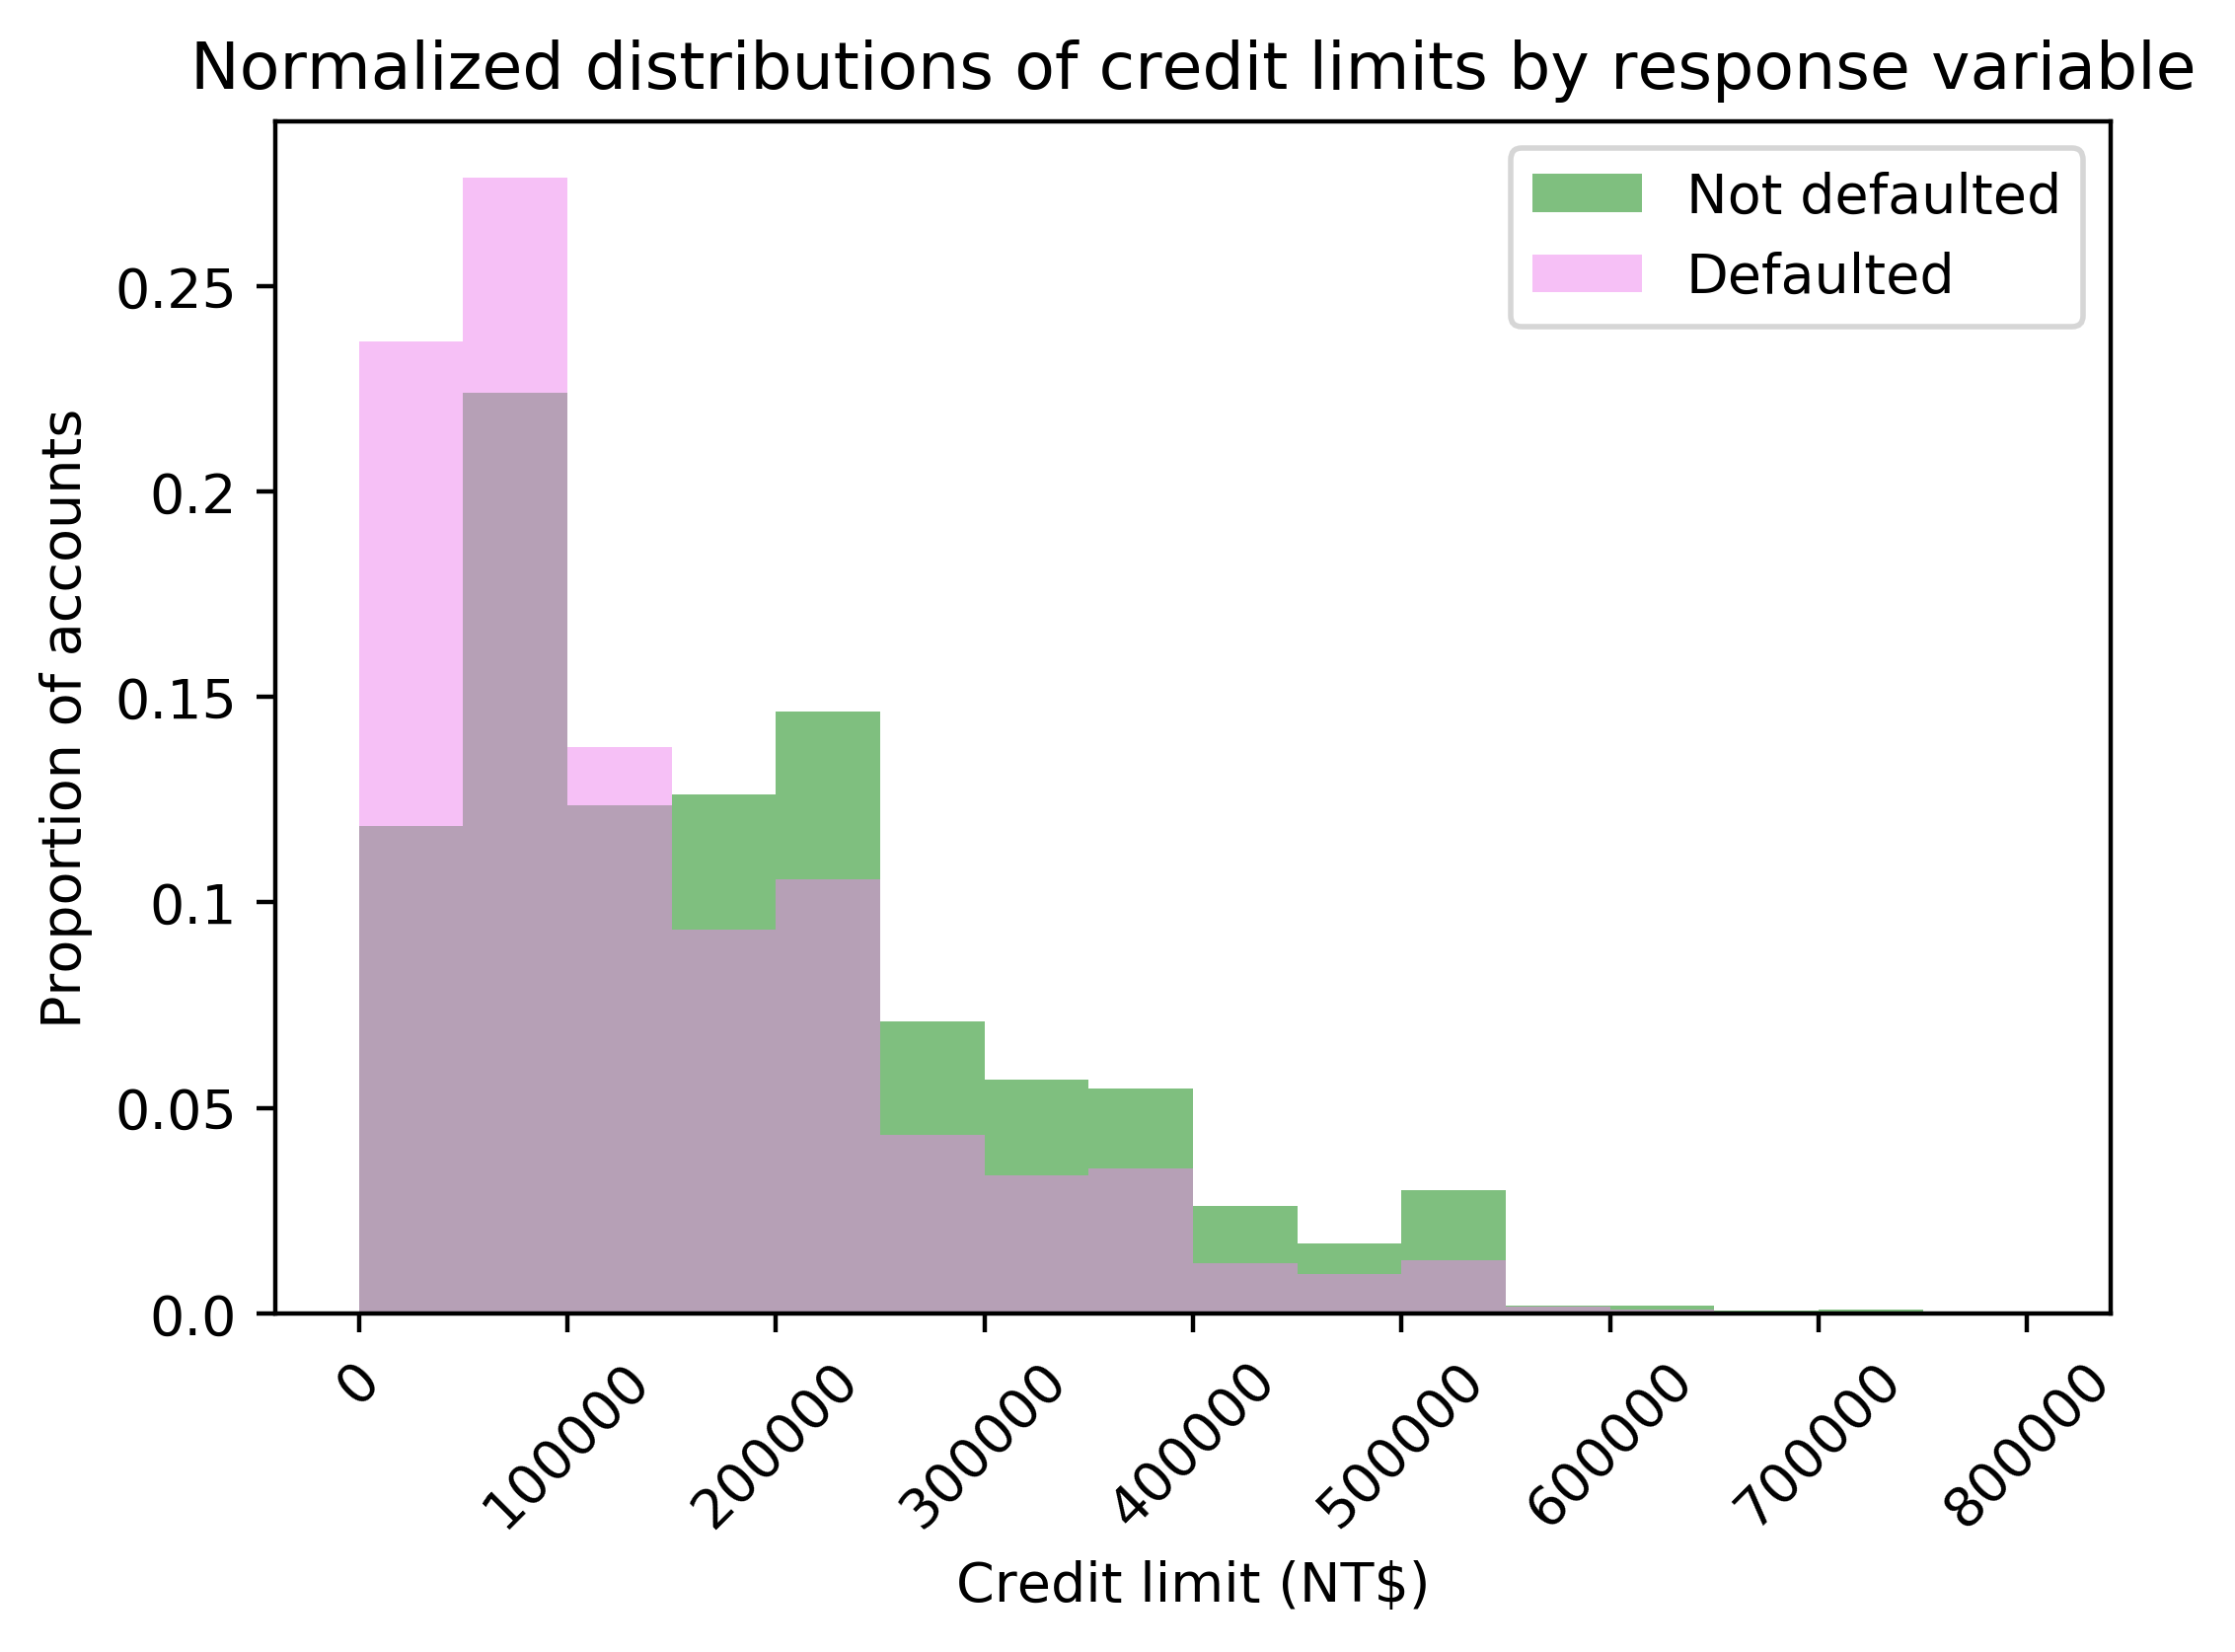

In [22]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='green')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='violet')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')

In [23]:
X_exp = np.linspace(-4, 4, 81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [24]:
y_exp = np.exp(X_exp)
y_exp

array([1.83156389e-02, 2.02419114e-02, 2.23707719e-02, 2.47235265e-02,
       2.73237224e-02, 3.01973834e-02, 3.33732700e-02, 3.68831674e-02,
       4.07622040e-02, 4.50492024e-02, 4.97870684e-02, 5.50232201e-02,
       6.08100626e-02, 6.72055127e-02, 7.42735782e-02, 8.20849986e-02,
       9.07179533e-02, 1.00258844e-01, 1.10803158e-01, 1.22456428e-01,
       1.35335283e-01, 1.49568619e-01, 1.65298888e-01, 1.82683524e-01,
       2.01896518e-01, 2.23130160e-01, 2.46596964e-01, 2.72531793e-01,
       3.01194212e-01, 3.32871084e-01, 3.67879441e-01, 4.06569660e-01,
       4.49328964e-01, 4.96585304e-01, 5.48811636e-01, 6.06530660e-01,
       6.70320046e-01, 7.40818221e-01, 8.18730753e-01, 9.04837418e-01,
       1.00000000e+00, 1.10517092e+00, 1.22140276e+00, 1.34985881e+00,
       1.49182470e+00, 1.64872127e+00, 1.82211880e+00, 2.01375271e+00,
       2.22554093e+00, 2.45960311e+00, 2.71828183e+00, 3.00416602e+00,
       3.32011692e+00, 3.66929667e+00, 4.05519997e+00, 4.48168907e+00,
      

Text(0.5, 1.0, 'Plot of $e^X$')

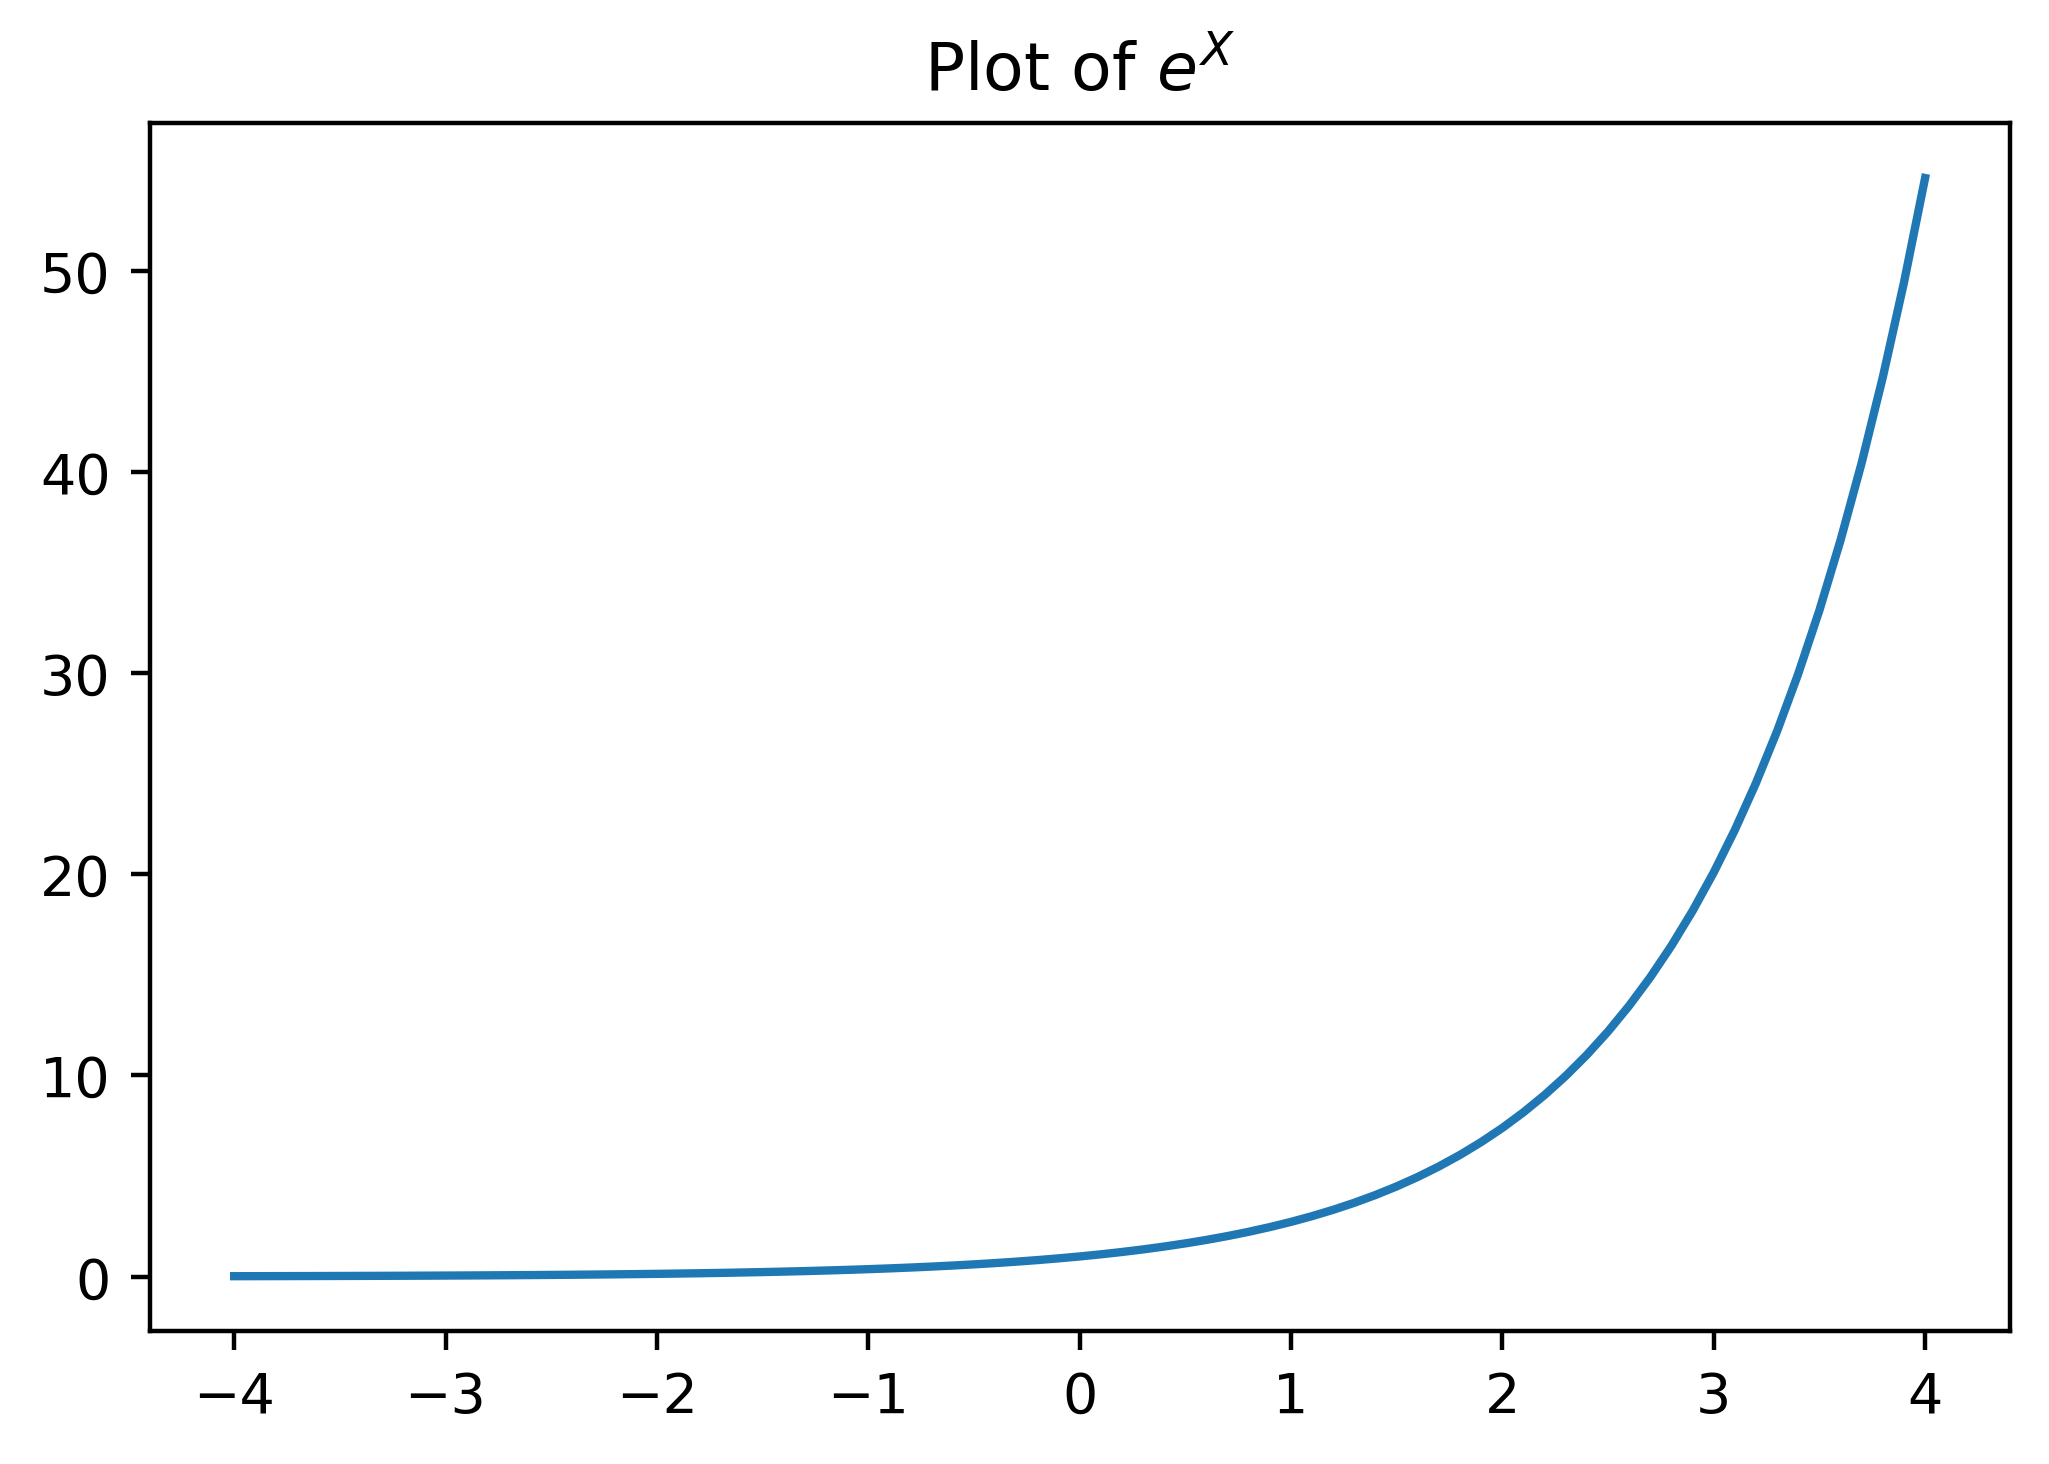

In [25]:
plt.plot(X_exp, y_exp)
plt.title('Plot of $e^X$')

Text(0.5, 1.0, 'Plot of $e^{-X}$')

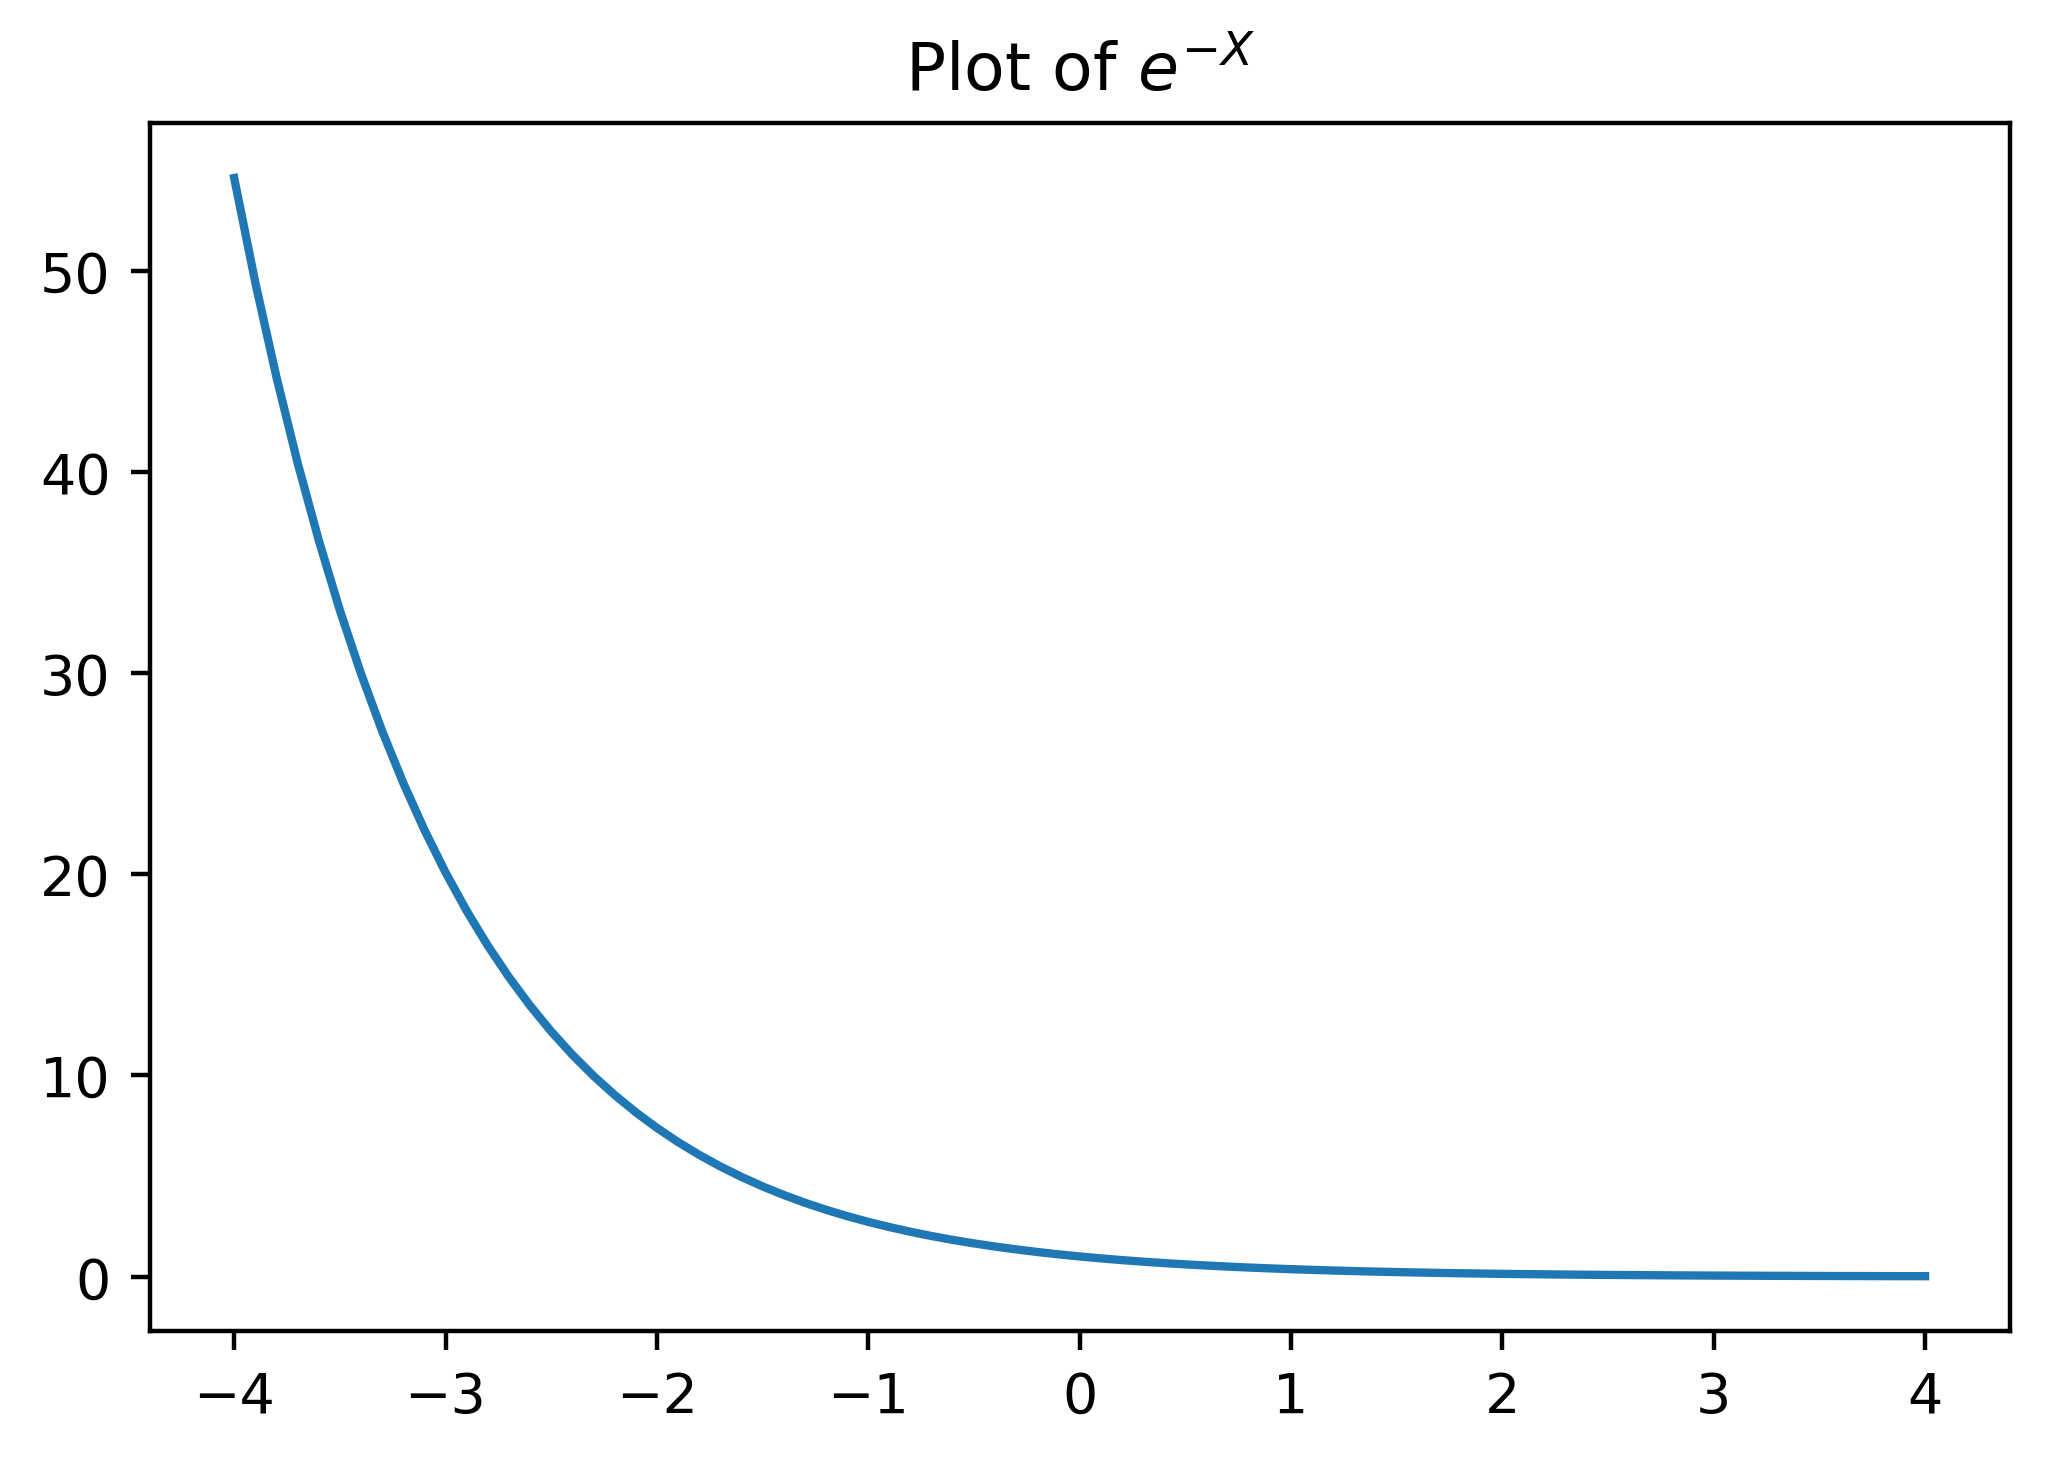

In [26]:
Y_exp = np.exp(-X_exp)
plt.plot(X_exp, Y_exp)
plt.title('Plot of $e^{-X}$')

Text(0.5, 1.0, 'SIGMOID FUNCTION')

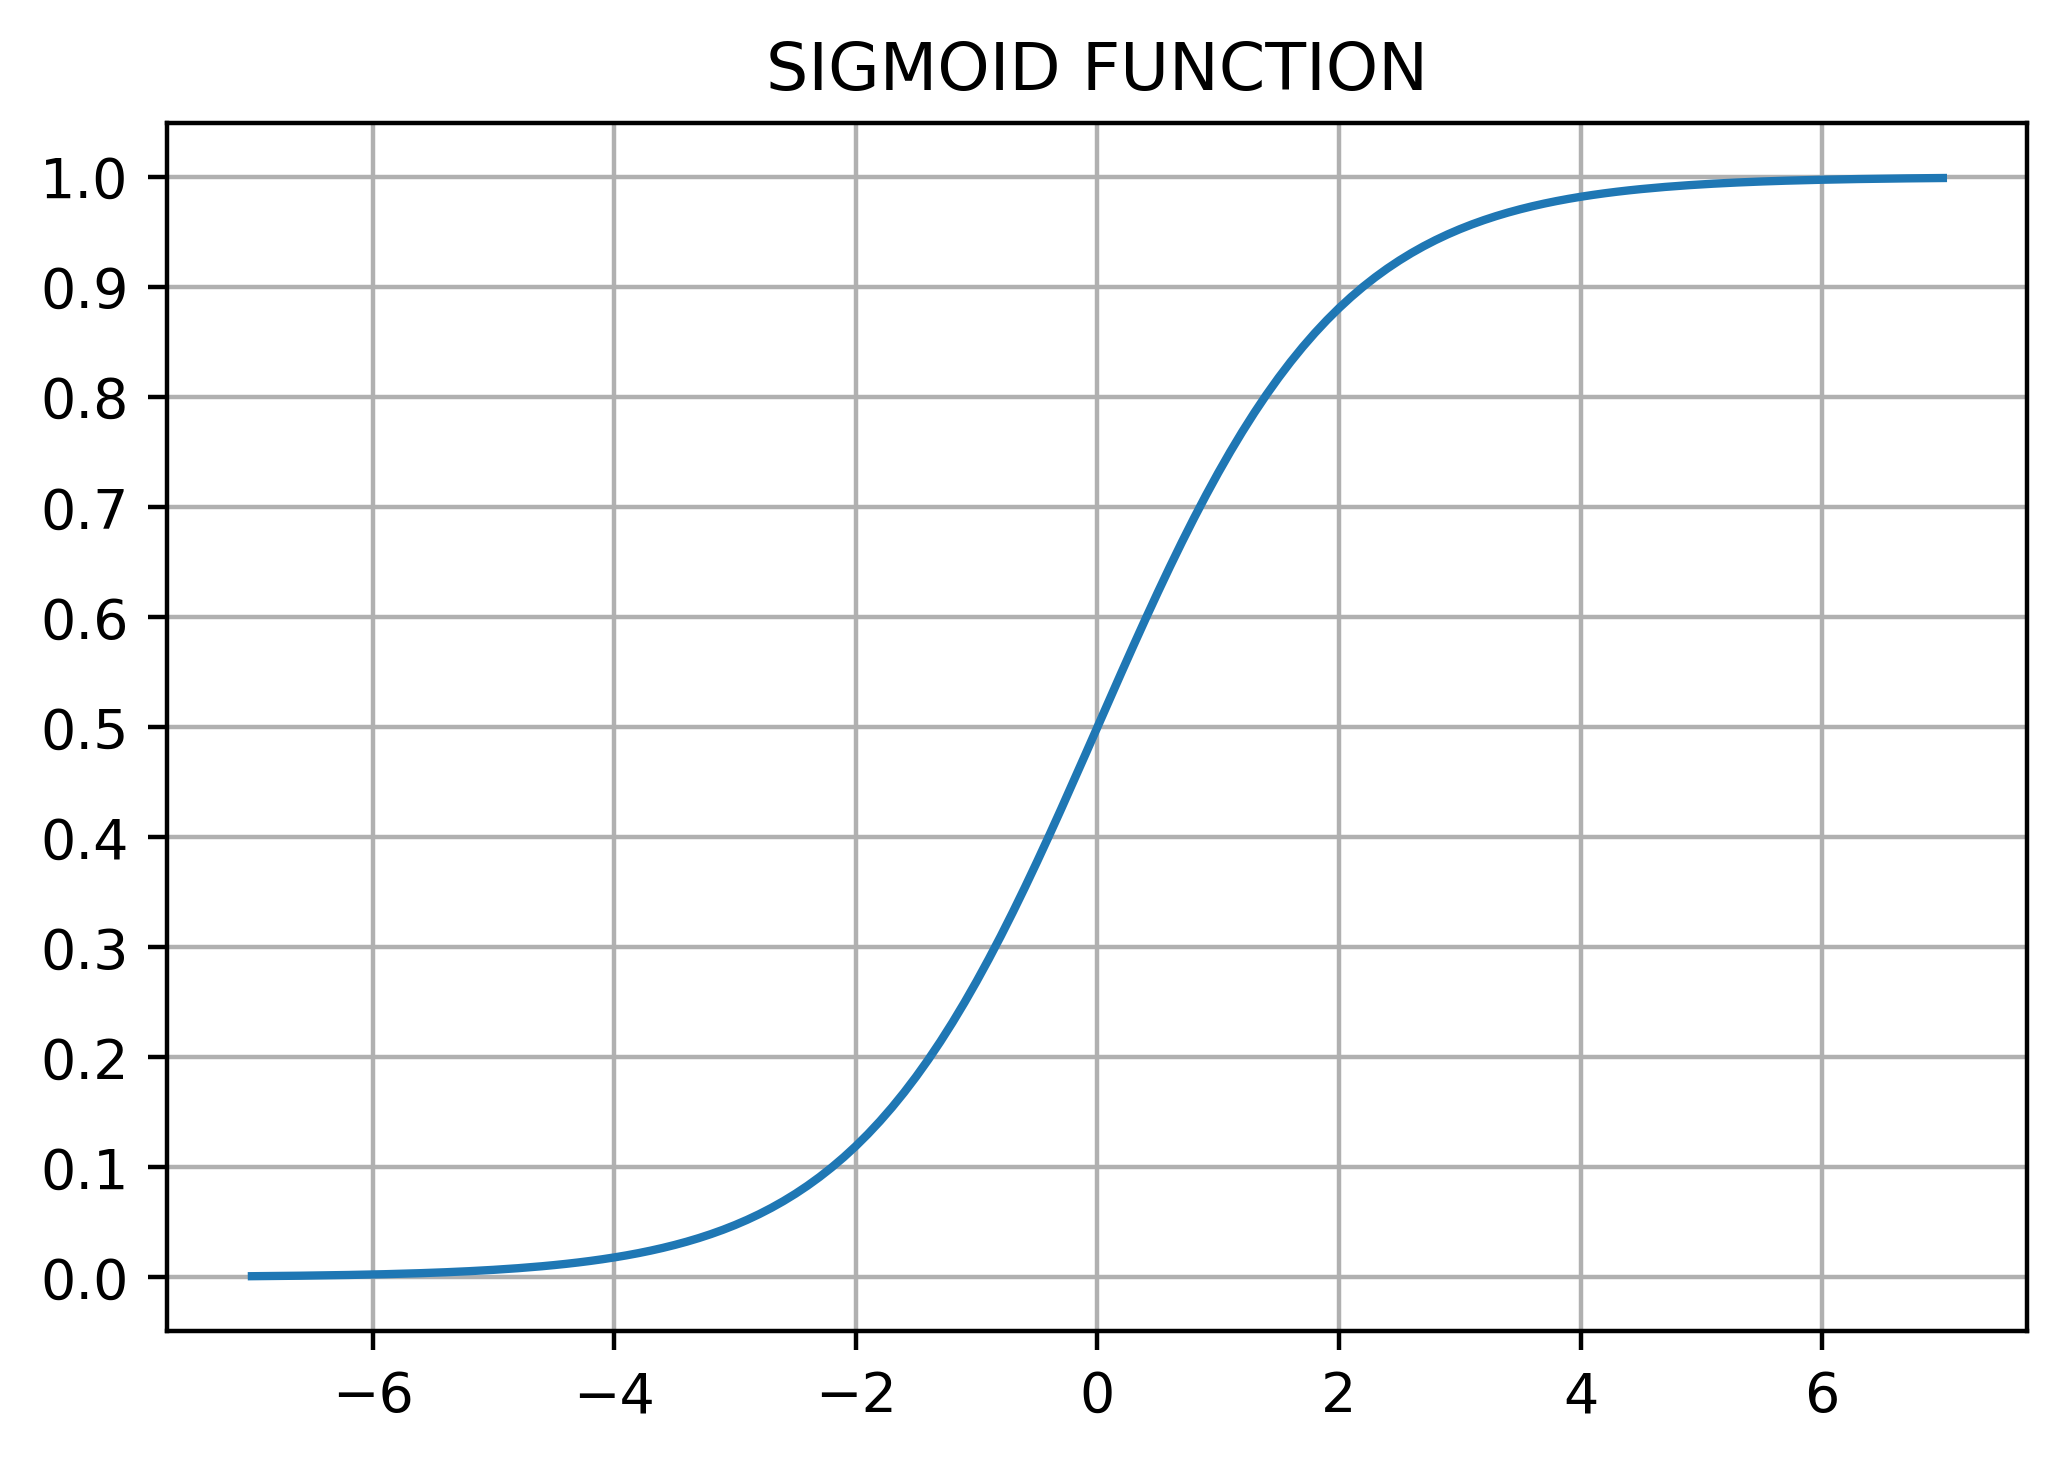

In [27]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)

plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('SIGMOID FUNCTION')

In [28]:
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


In [29]:
# probabilities that the accounts will be defaulting
p = group_by_pay_mean_y['default payment next month'].values
# probabilities that the accounts will not be defaulting
q = 1-p
print(p)
print(q)

[0.13166397 0.17000198 0.12829525 0.33639988 0.69470143 0.7739726
 0.68253968 0.43478261 0.54545455 0.77777778 0.58823529]
[0.86833603 0.82999802 0.87170475 0.66360012 0.30529857 0.2260274
 0.31746032 0.56521739 0.45454545 0.22222222 0.41176471]


In [30]:
odds_ratio = p/q
log_odds = np.log(odds_ratio)
log_odds


array([-1.88632574, -1.58561322, -1.91611649, -0.67937918,  0.82219194,
        1.23088026,  0.76546784, -0.26236426,  0.18232156,  1.25276297,
        0.35667494])

Text(0.5, 0, 'Values of PAY_1')

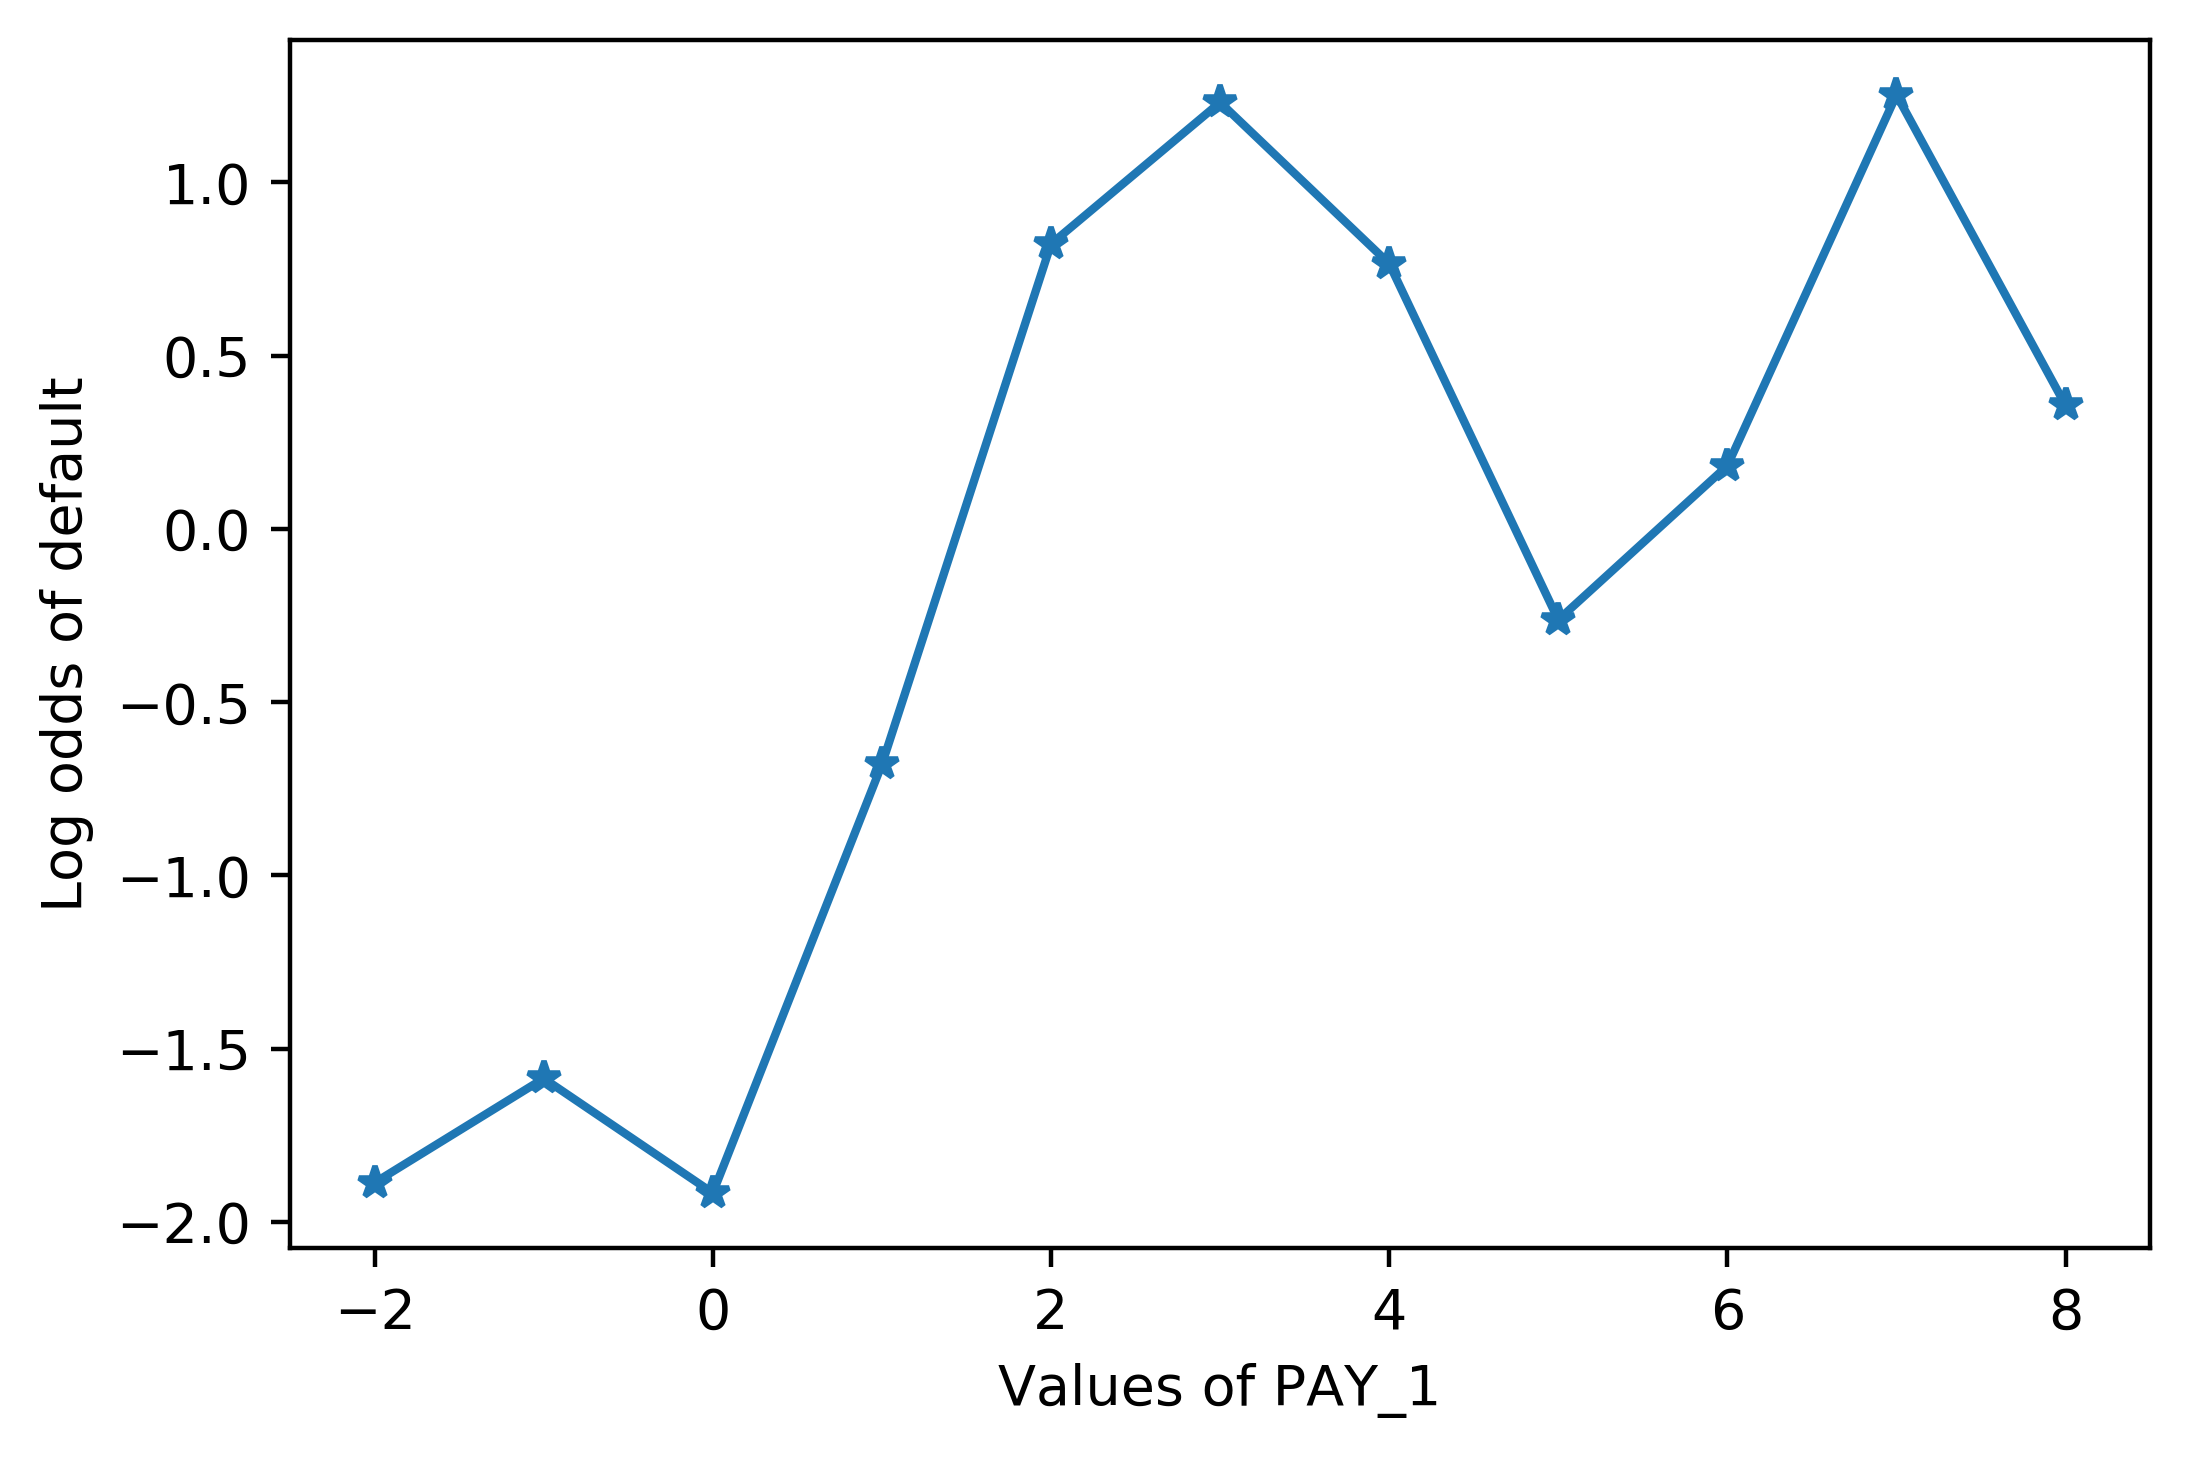

In [31]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-*')
plt.ylabel('Log odds of default')
plt.xlabel('Values of PAY_1')

[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]
[[6.35716091]
 [2.99187883]
 [5.92737474]]
[[3.38132155]
 [8.03046066]
 [8.61519394]]


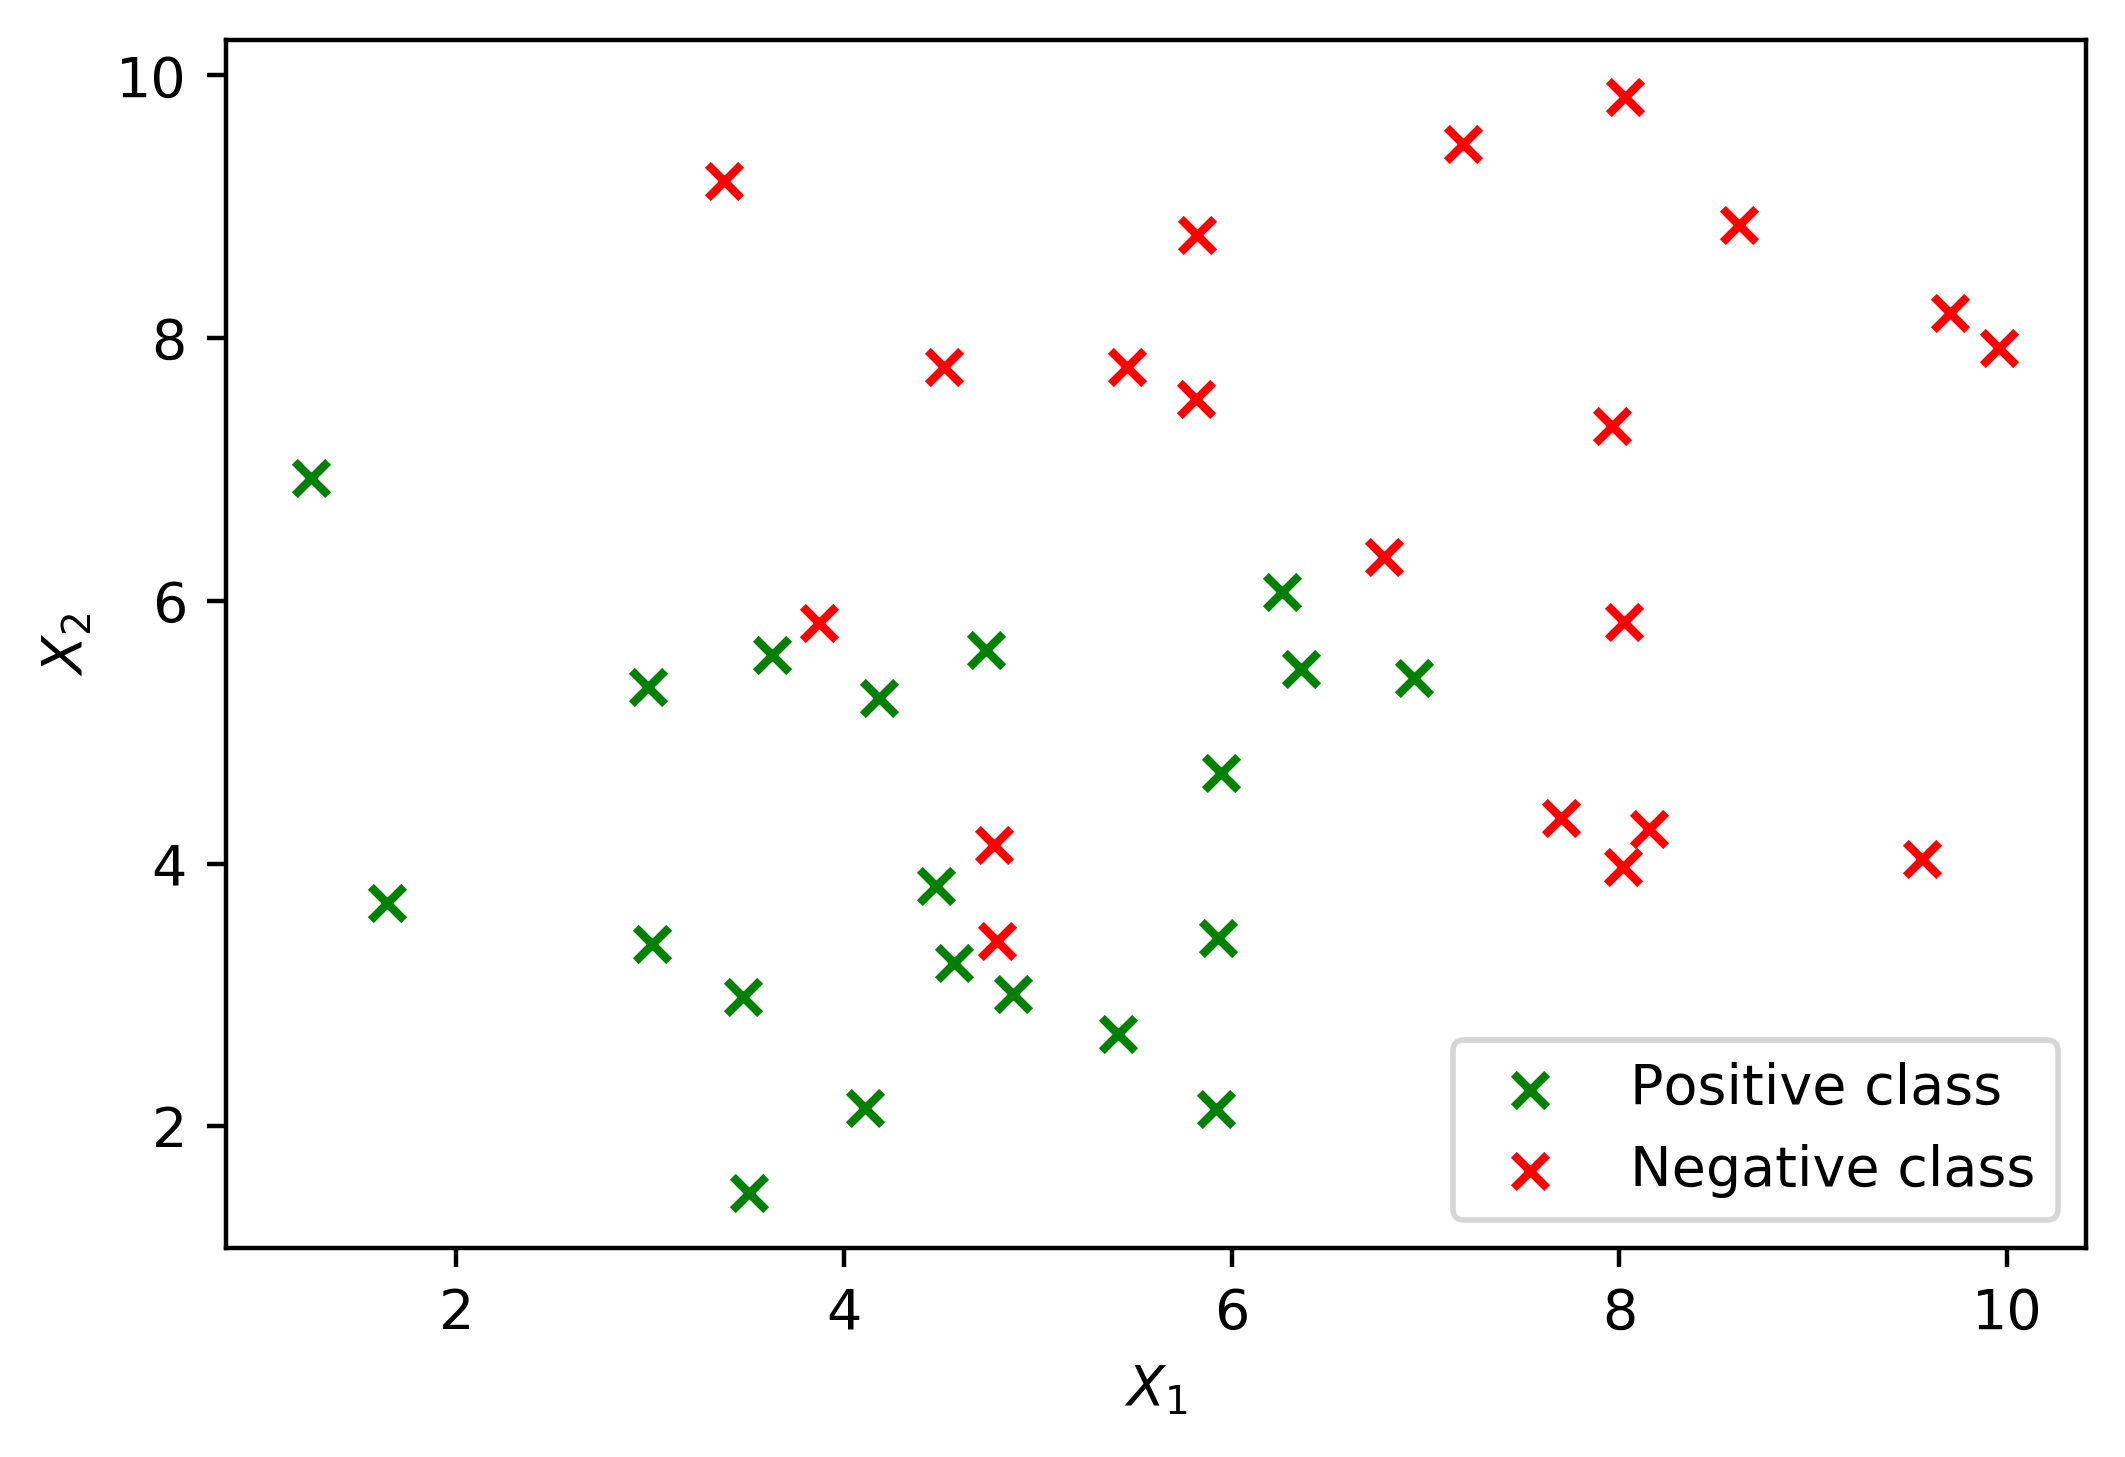

In [32]:
np.random.seed(seed=6)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])


plt.scatter(X_1_pos, X_2_pos, color='green', marker='x')
plt.scatter(X_1_neg, X_2_neg, color='red', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [33]:

# Create a train/test split
X = df[['PAY_1', 'LIMIT_BAL']]
y = df['default payment next month']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 24)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21331, 2), (21331,), (5333, 2), (5333,))

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [35]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver = 'liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [36]:
# Fit the logistic regression model on training data
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# Make predictions using `.predict()`
y_pred = lr_model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [38]:
# Find class probabilities using `.predict_proba()`
y_proba = lr_model.predict_proba(X_test)
y_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [39]:
# Get coefficients and intercepts from trained model
coef = lr_model.coef_
intercept = lr_model.intercept_

In [40]:
# Manually calculate predicted probabilities
manual_y_proba = sigmoid((coef * X_test.values) + intercept)
manual_y_proba

array([[0.5       , 0.25173076],
       [0.5       , 0.415703  ],
       [0.5       , 0.20395547],
       ...,
       [0.5       , 0.415703  ],
       [0.5       , 0.17278502],
       [0.5       , 0.33606565]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [41]:
# Manually calculate predicted classes
threshold = 0.5
manual_y_pred = []

for i in manual_y_proba[:,1]:
    if i >= threshold:
        manual_y_pred.append(1)
    else:
        manual_y_pred.append(0)

manual_y_pred = np.asarray(manual_y_pred)

manual_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
# Compare to scikit-learn's predicted classes
pos = y_pred == 1
neg = y_pred == 0
manual_pos = manual_y_pred == 1
manual_neg = manual_y_pred == 0
print(f"Positives = {sum(pos)} and Negatives = {sum(neg)} are predicted classes.")

Positives = 0 and Negatives = 5333 are predicted classes.


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [43]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn import metrics

print(f"ROC AUC Score for predicted probabilities: {metrics.roc_auc_score(y_test, y_proba[:, 1])}")

ROC AUC Score for predicted probabilities: 0.627207450280691


In [44]:
# Use manually calculated predicted probabilities to calculate ROC AUC
print(f"ROC AUC Score for manually predicted probabilities: {metrics.roc_auc_score(y_test, manual_y_proba[:, 1])}")

ROC AUC Score for manually predicted probabilities: 0.6201990844642832


In [46]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier1.pkl","wb")
pickle.dump(lr_model, pickle_out)
pickle_out.close()